<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/kmeans_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import requests
import io


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/heart.csv"
file=requests.get(url).content
heart_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0


In [4]:
import tensorflow as tf
from tensorflow.contrib.factorization import KMeans

In [5]:
heart_data.values

array([[63. ,  1. ,  3. , ...,  2.3,  0. ,  0. ],
       [37. ,  1. ,  2. , ...,  3.5,  0. ,  2. ],
       [41. ,  0. ,  1. , ...,  1.4,  2. ,  1. ],
       ...,
       [68. ,  1. ,  0. , ...,  3.4,  1. ,  0. ],
       [57. ,  1. ,  0. , ...,  1.2,  1. ,  0. ],
       [57. ,  0. ,  1. , ...,  0. ,  1. ,  1. ]])

In [6]:
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(heart_data.values, dtype=tf.float32), num_epochs=1)

num_clusters = 2
kmeans = tf.contrib.factorization.KMeansClustering(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  #cluster_centers = kmeans.cluster_centers()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3nd3xesz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_tim

In [10]:
assignments = list(kmeans.predict_cluster_index(input_fn=input_fn))
centroid_values = kmeans.cluster_centers()
print(assignments)
assignments.count(0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3nd3xesz/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0

193

In [8]:
heart_data.values[:,1]

array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1.

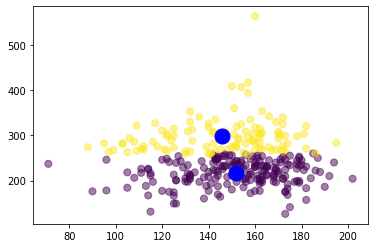

In [12]:
plt.scatter(heart_data.values[:, 7], heart_data.values[:, 4], c=assignments, s=50, alpha=0.5)
plt.plot(centroid_values[:, 7], centroid_values[:, 4], 'bo', markersize=15)
plt.show()
